#### sklearn.model_selection.KFold
* class sklearn.model_selection.KFold(n_splits=5, *, shuffle=False, random_state=None)[source]

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np
from sklearn.datasets import load_iris

In [82]:
iris=load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=11)

kfold = KFold()
cv_accuracy=[]
for i , j in kfold.split(X_train, y_train):
#     print(f'train set : {i}')
#     print(f'validation set : {j}')
#     print('\n')
    train_X , test_X = X_train[i], X_train[j]
    train_y , test_y = y_train[i], y_train[j]
    dt_clf.fit(train_X, train_y)
    pred = dt_clf.predict(test_X)
    accuracy = np.round(accuracy_score(test_y,pred), 4)
    cv_accuracy.append(accuracy)
#     print(accuracy)
print(cv_accuracy)   
np.mean(cv_accuracy)

[0.875, 0.9583, 1.0, 0.9167, 0.9583]


0.94166

In [84]:
from sklearn.model_selection import train_test_split
kfold = KFold()
cv_accuracy = []
n_iter=0
for train_index  , test_index in kfold.split(features):
#     print(f"train set :{i}")
#     print(f"validation set :{j}")
#     print('\n')
    n_iter +=1
    X_train , X_test = features[train_index] , features[test_index]
    y_train , y_test = label[train_index] , label[test_index]
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    cv_accuracy.append(accuracy)
#     print(accuracy)
print(cv_accuracy)
np.mean(cv_accuracy)

[1.0, 0.9667, 0.8667, 0.9333, 0.7333]


0.9

In [85]:
# kfold의 문제점

from sklearn.model_selection import train_test_split
kfold = KFold(n_splits=3)
cv_accuracy = []
n_iter = 0

for train_index  , test_index in kfold.split(features):
#     print(f"train set :{i}")
#     print(f"validation set :{j}")
#     print('\n')
    n_iter +=1
    X_train , X_test = features[train_index] , features[test_index]
    y_train , y_test = label[train_index] , label[test_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    print(f'\n{n_iter}번째 정확도 {accuracy}  , 학습데이터 크기 {X_train.shape[0]}, 검증데이터 크기 {X_test.shape[0]}')
    print(f'\n {n_iter}번째 검증데이터 인덱스 {test_index} ')
    cv_accuracy.append(accuracy)
    
#     print(accuracy)
# print(cv_accuracy)
# np.mean(cv_accuracy)


1번째 정확도 0.0  , 학습데이터 크기 100, 검증데이터 크기 50

 1번째 검증데이터 인덱스 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] 

2번째 정확도 0.0  , 학습데이터 크기 100, 검증데이터 크기 50

 2번째 검증데이터 인덱스 [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99] 

3번째 정확도 0.0  , 학습데이터 크기 100, 검증데이터 크기 50

 3번째 검증데이터 인덱스 [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149] 


#### sklearn.model_selection.StratifiedKFold
* class sklearn.model_selection.StratifiedKFold(n_splits=5, *, shuffle=False, random_state=None)

In [86]:
from sklearn.model_selection import StratifiedKFold

sfk = StratifiedKFold(n_splits=3)
cv_accuracy = []
n_iter = 0
for train_index, test_index in sfk.split(features, label):
    n_iter +=1
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    print(f'\n{n_iter}번째 정확도 {accuracy}  , 학습데이터 크기 {X_train.shape[0]}, 검증데이터 크기 {X_test.shape[0]}')
    print(f'\n {n_iter}번째 검증데이터 인덱스 {test_index} ')
    cv_accuracy.append(accuracy)
np.mean(cv_accuracy)


1번째 정확도 0.98  , 학습데이터 크기 100, 검증데이터 크기 50

 1번째 검증데이터 인덱스 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115] 

2번째 정확도 0.94  , 학습데이터 크기 100, 검증데이터 크기 50

 2번째 검증데이터 인덱스 [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132] 

3번째 정확도 0.98  , 학습데이터 크기 100, 검증데이터 크기 50

 3번째 검증데이터 인덱스 [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149] 


0.9666666666666667

#### sklearn.model_selection.cross_val_score
* sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)

In [87]:
from sklearn.model_selection import cross_val_score, cross_validate
iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)
features = iris_data.data
label = iris_data.target
# 성능 지표는 정확도(Accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, features, label, scoring='accuracy', cv=3)
print(f'교차 검증별 정확도: {np.round(scores, 4)}')
print(f'평균 검증 정확도: {np.round(np.mean(scores), 4)}')

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


#### sklearn.model_selection.GridSearchCV
* class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
# 데이터를 로딩하고 학습데이터와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()
## parameter들을 dictionary형태로 설정
parameters = {'max_depth' : [1,2,3], 'min_samples_split' : [2,3]}
import pandas as pd
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)
# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)
# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',\
    'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [89]:
grid_dtree.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [90]:
grid_dtree.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [91]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_
# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도 : 0.9667


#### sklearn.datasets.make_classification
* sklearn.datasets.make_classification(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)

300
[1 2 2 2 2 1 1 1 2 1 1 2 1 1 1 1 0 1 2 2 0 2 1 0 2 0 2 0 0 1 1 0 0 0 1 1 0
 0 0 1 1 2 1 0 2 1 0 0 1 2 0 1 2 0 1 2 1 1 2 2 2 0 1 2 1 2 0 1 1 1 2 1 1 0
 0 0 2 2 0 1 0 2 1 0 0 2 1 2 2 1 2 1 0 2 0 2 0 0 2 0 1 2 1 0 2 0 0 0 2 1 2
 1 2 1 0 2 2 2 1 2 2 0 1 1 0 0 2 1 0 1 0 1 1 0 1 2 0 2 0 2 1 1 1 2 1 1 2 1
 2 0 0 2 1 1 1 2 1 1 2 2 0 1 0 2 0 2 1 2 0 1 0 1 1 0 2 1 0 1 2 0 2 1 0 0 0
 2 0 1 0 1 2 2 2 1 2 0 0 0 2 2 0 1 1 1 1 0 2 1 2 2 2 0 1 0 2 0 0 0 1 0 1 2
 0 0 2 0 2 2 2 0 0 1 1 0 2 2 0 2 1 0 2 1 0 2 2 0 0 1 1 0 1 1 2 0 0 2 1 2 0
 0 2 1 2 1 1 0 1 1 2 0 0 0 1 2 2 1 0 2 1 0 1 0 2 0 0 0 1 2 0 0 2 0 2 2 2 2
 2 1 2 0]
[[ 1.44376956  0.33838381]
 [-0.97372858 -1.15643418]
 [-0.8084432  -1.17345151]
 [-0.98852958 -0.8140137 ]
 [-1.00194335 -1.17539771]
 [ 0.48908494  2.90355527]
 [ 0.29005246  1.32068778]
 [ 0.60959554  0.5789389 ]
 [-1.33804333 -0.66975591]
 [ 2.61511115  0.29713169]
 [-0.09384868  2.10927158]
 [-0.76723702 -2.61297156]
 [ 1.91996933  0.05862907]
 [ 0.41980661 -0.29133645]
 [ 0.268

C:\Users\cmjid\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from current font.
  func(*args, **kwargs)
C:\Users\cmjid\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  func(*args, **kwargs)
C:\Users\cmjid\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  func(*args, **kwargs)
C:\Users\cmjid\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  func(*args, **kwargs)
C:\Users\cmjid\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  func(*args,

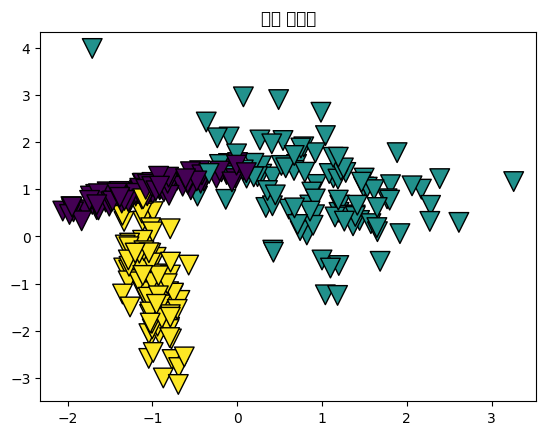

In [94]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

plt.title("다중 클래스")
#flip_y 매개변수를 이용한 노이즈 추가
X, y = make_classification(n_samples=300,
                           n_features=2, 
                           n_informative=2,
                           n_redundant=0, 
                           n_clusters_per_class=1, 
                           random_state=42,
                           n_classes=3
                          )
print(len(X))
print(y)
print(X)
plt.scatter(X[:, 0], X[:, 1], marker='v', c=y,
            s=200, edgecolor="k",)



In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
# 데이터를 로딩하고 학습데이터와 테스트 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier()
## parameter들을 dictionary형태로 설정
parameters = {'max_depth' : [1,2,3], 'min_samples_split' : [2,3]}
import pandas as pd
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)
# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)
# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',\
    'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.625000,5,0.6125,0.625,0.6375
1,"{'max_depth': 1, 'min_samples_split': 3}",0.625000,5,0.6125,0.625,0.6375
2,"{'max_depth': 2, 'min_samples_split': 2}",0.891667,3,0.8875,0.875,0.9125
3,"{'max_depth': 2, 'min_samples_split': 3}",0.891667,3,0.8875,0.875,0.9125
4,"{'max_depth': 3, 'min_samples_split': 2}",0.912500,1,0.9000,0.875,0.9625
5,"{'max_depth': 3, 'min_samples_split': 3}",0.912500,1,0.9000,0.875,0.9625


In [99]:
pred=grid_dtree.predict(X_test)

In [100]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.95

In [107]:
# Pima Indians Diabetes Database
from sklearn.datasets import load_diabetes

diabet= load_diabetes()
diabet.keys()


dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [108]:
diabet.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [118]:
import pandas as pd
features= diabet.data
label= diabet.target

diabet_df=pd.DataFrame(features,columns=diabet.feature_names)
diabet_df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930


In [119]:
diabet_df['label']=label
diabet_df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,label
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0


In [123]:
import pandas as pd
diabet_df= pd.read_csv('./datasets/diabetes.csv')
diabet_df.head(3)
    

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [125]:
diabet_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [132]:
features = diabet_df.drop('Outcome', axis=1)
label = diabet_df['Outcome']
features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습데이터와 테스트 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()
## parameter들을 dictionary형태로 설정
parameters = {'max_depth' : [1,2,3], 'min_samples_split' : [2,3]}
import pandas as pd
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

grid_dtree.fit(X_train, y_train)
# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',\
    'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.711701,3,0.731707,0.707317,0.696078
1,"{'max_depth': 1, 'min_samples_split': 3}",0.711701,3,0.731707,0.707317,0.696078
2,"{'max_depth': 2, 'min_samples_split': 2}",0.723139,1,0.731707,0.707317,0.730392
3,"{'max_depth': 2, 'min_samples_split': 3}",0.723139,1,0.731707,0.707317,0.730392
4,"{'max_depth': 3, 'min_samples_split': 2}",0.695441,5,0.707317,0.682927,0.696078
5,"{'max_depth': 3, 'min_samples_split': 3}",0.695441,5,0.707317,0.682927,0.696078


In [148]:
X_test.iloc[:1]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
601,6,96,0,0,0,23.7,0.19,28


In [139]:
y_test

601    0
224    0
766    1
17     1
369    1
      ..
479    0
283    1
554    0
688    0
81     0
Name: Outcome, Length: 154, dtype: int64

In [149]:
grid_dtree.predict(X_test.iloc[:1])

array([0], dtype=int64)